In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Introducing data

In [2]:
# Projected travels into the future according to demographics and land use
P_is = np.array([750, 580, 480])    # produced
A_js = np.array([722, 786, 302])    # attracted

# Matrix of travels obtained with gravitational model, neutral calibration coeffs (simulating historical data)
gvalsr_m = np.array([[82, 140, 78], [43, 26, 31], [82, 31, 37]])

# Adjusted intial travels matrices
gvalsadjA = np.array([[81, 116, 103], [40, 20, 39], [78, 25, 47]])    # interative adjustment (Furness style)
gvalsadjB = np.array([[78, 112, 110], [40, 22, 38], [83, 26, 40]])    # weighted adjustment (new method)

# Calibration coefficients resulted accordingly
ccoeffsA = np.array([[0.49, 0.95, 1.46], [1.25, 1, 0.77], [1.41, 1.2, 0.21]])    # iterative ...
ccoeffsB = np.array([[0.51, 0.98, 1.36], [1.25, 0.91, 0.79], [1.33, 1.15, 0.25]])    # weighted ...

# Matrix of future travels obtained with gravitational model and ccoeffsA matrix
gvalsr_finA = np.array([[112, 377, 245], [298, 241, 49], [312, 168, 8]])
# Matrix of future travels obtained with gravitational model and ccoeffsB matrix
gvalsr_finB = np.array([[115, 392, 238], [302, 225, 54], [304, 169, 10]])

# Matrix of travels obtained with Furness method
travsc_furn = np.array([[99, 452, 199], [292, 194, 94], [320, 145, 16]])

# Matrix of travels obtained with Fratar method
travsc_frat = np.array([[105, 452, 192], [306, 186, 88], [330, 136, 14]])

# Matrix of travels obtained with average growth factor
travsc_avgf = np.array([[105, 463, 188], [295, 173, 104], [326, 140, 15]])

# Matrix of travels obtained with Detroit method
travsc_detr = np.array([[103, 458, 199], [295, 191, 91], [318, 141, 15]])

# Matrix of travels obtained with weighted method (new method)
travsc_wgtd = np.array([[104, 488, 158], [294, 154, 130], [323, 143, 14]])

#### Flatten the original arrays

In [3]:
gvalsr_finAflat = gvalsr_finA.flatten()
gvalsr_finBflat = gvalsr_finB.flatten()

travsc_furnflat = travsc_furn.flatten()

travsc_fratflat = travsc_frat.flatten()

travsc_avgfflat = travsc_avgf.flatten()

travsc_detrflat = travsc_detr.flatten()

travsc_wgtdflat = travsc_wgtd.flatten()

#### Create two dfs from flattened arrays

In [4]:
all_travs = pd.DataFrame(data=[gvalsr_finAflat, travsc_fratflat,
                               travsc_furnflat, travsc_avgfflat,
                               travsc_detrflat,travsc_wgtdflat]).T
all_travs.columns = ['gravit', 'fratar', 'furness', 'avGF', 'detroit', 'weighted']
all_travs.head(9)

,gravit,fratar,furness,avGF,detroit,weighted
0,112,105,99,105,103,104
1,377,452,452,463,458,488
2,245,192,199,188,199,158
3,298,306,292,295,295,294
4,241,186,194,173,191,154
5,49,88,94,104,91,130
6,312,330,320,326,318,323
7,168,136,145,140,141,143
8,8,14,16,15,15,14


In [5]:
growthfact = all_travs.loc[:, ['fratar', 'furness', 'avGF', 'detroit', 'weighted']]
growthfact.head(9)

,fratar,furness,avGF,detroit,weighted
0,105,99,105,103,104
1,452,452,463,458,488
2,192,199,188,199,158
3,306,292,295,295,294
4,186,194,173,191,154
5,88,94,104,91,130
6,330,320,326,318,323
7,136,145,140,141,143
8,14,16,15,15,14


#### Check correlation

In [6]:
# Pearson correlation table with colorscheme, all methods
all_travs.corr().style.background_gradient(cmap='coolwarm')

,gravit,fratar,furness,avGF,detroit,weighted
gravit,1.000000,0.952239,0.954899,0.933877,0.952855,0.886412
fratar,0.952239,1.000000,0.998409,0.997645,0.998695,0.983144
furness,0.954899,0.998409,1.000000,0.997217,0.999746,0.982443
avGF,0.933877,0.997645,0.997217,1.000000,0.997671,0.992463
detroit,0.952855,0.998695,0.999746,0.997671,1.000000,0.983345
weighted,0.886412,0.983144,0.982443,0.992463,0.983345,1.000000


In [7]:
# Pearson correlation table with colorscheme, growth factor methods
growthfact.corr().style.background_gradient(cmap='coolwarm')

,fratar,furness,avGF,detroit,weighted
fratar,1.000000,0.998409,0.997645,0.998695,0.983144
furness,0.998409,1.000000,0.997217,0.999746,0.982443
avGF,0.997645,0.997217,1.000000,0.997671,0.992463
detroit,0.998695,0.999746,0.997671,1.000000,0.983345
weighted,0.983144,0.982443,0.992463,0.983345,1.000000


#### Get the stats tableau and median for each column in dfs

In [8]:
all_travs.T

,0,1,2,3,4,5,6,7,8
gravit,112,377,245,298,241,49,312,168,8
fratar,105,452,192,306,186,88,330,136,14
furness,99,452,199,292,194,94,320,145,16
avGF,105,463,188,295,173,104,326,140,15
detroit,103,458,199,295,191,91,318,141,15
weighted,104,488,158,294,154,130,323,143,14


In [9]:
all_travs.describe()

,gravit,fratar,furness,avGF,detroit,weighted
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,201.111111,201.000000,201.222222,201.000000,201.222222,200.888889
std,125.302079,137.909391,134.494217,137.386317,136.279839,142.628402
min,8.000000,14.000000,16.000000,15.000000,15.000000,14.000000
25%,112.000000,105.000000,99.000000,105.000000,103.000000,130.000000
50%,241.000000,186.000000,194.000000,173.000000,191.000000,154.000000
75%,298.000000,306.000000,292.000000,295.000000,295.000000,294.000000
max,377.000000,452.000000,452.000000,463.000000,458.000000,488.000000


In [10]:
all_travs.apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
0,6.0,104.666667,4.226898,99.0,103.25,104.5,105.00,112.0
1,6.0,448.333333,37.409446,377.0,452.00,455.0,461.75,488.0
2,6.0,196.833333,28.067181,158.0,189.00,195.5,199.00,245.0
3,6.0,296.666667,4.966555,292.0,294.25,295.0,297.25,306.0
4,6.0,189.833333,29.047662,154.0,176.25,188.5,193.25,241.0
5,6.0,92.666667,26.288147,49.0,88.75,92.5,101.50,130.0
6,6.0,321.500000,6.316645,312.0,318.50,321.5,325.25,330.0
7,6.0,145.500000,11.432410,136.0,140.25,142.0,144.50,168.0
8,6.0,13.666667,2.875181,8.0,14.00,14.5,15.00,16.0


In [11]:
# all_travs.describe().T

In [12]:
growthfact.describe()

,fratar,furness,avGF,detroit,weighted
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,201.000000,201.222222,201.000000,201.222222,200.888889
std,137.909391,134.494217,137.386317,136.279839,142.628402
min,14.000000,16.000000,15.000000,15.000000,14.000000
25%,105.000000,99.000000,105.000000,103.000000,130.000000
50%,186.000000,194.000000,173.000000,191.000000,154.000000
75%,306.000000,292.000000,295.000000,295.000000,294.000000
max,452.000000,452.000000,463.000000,458.000000,488.000000


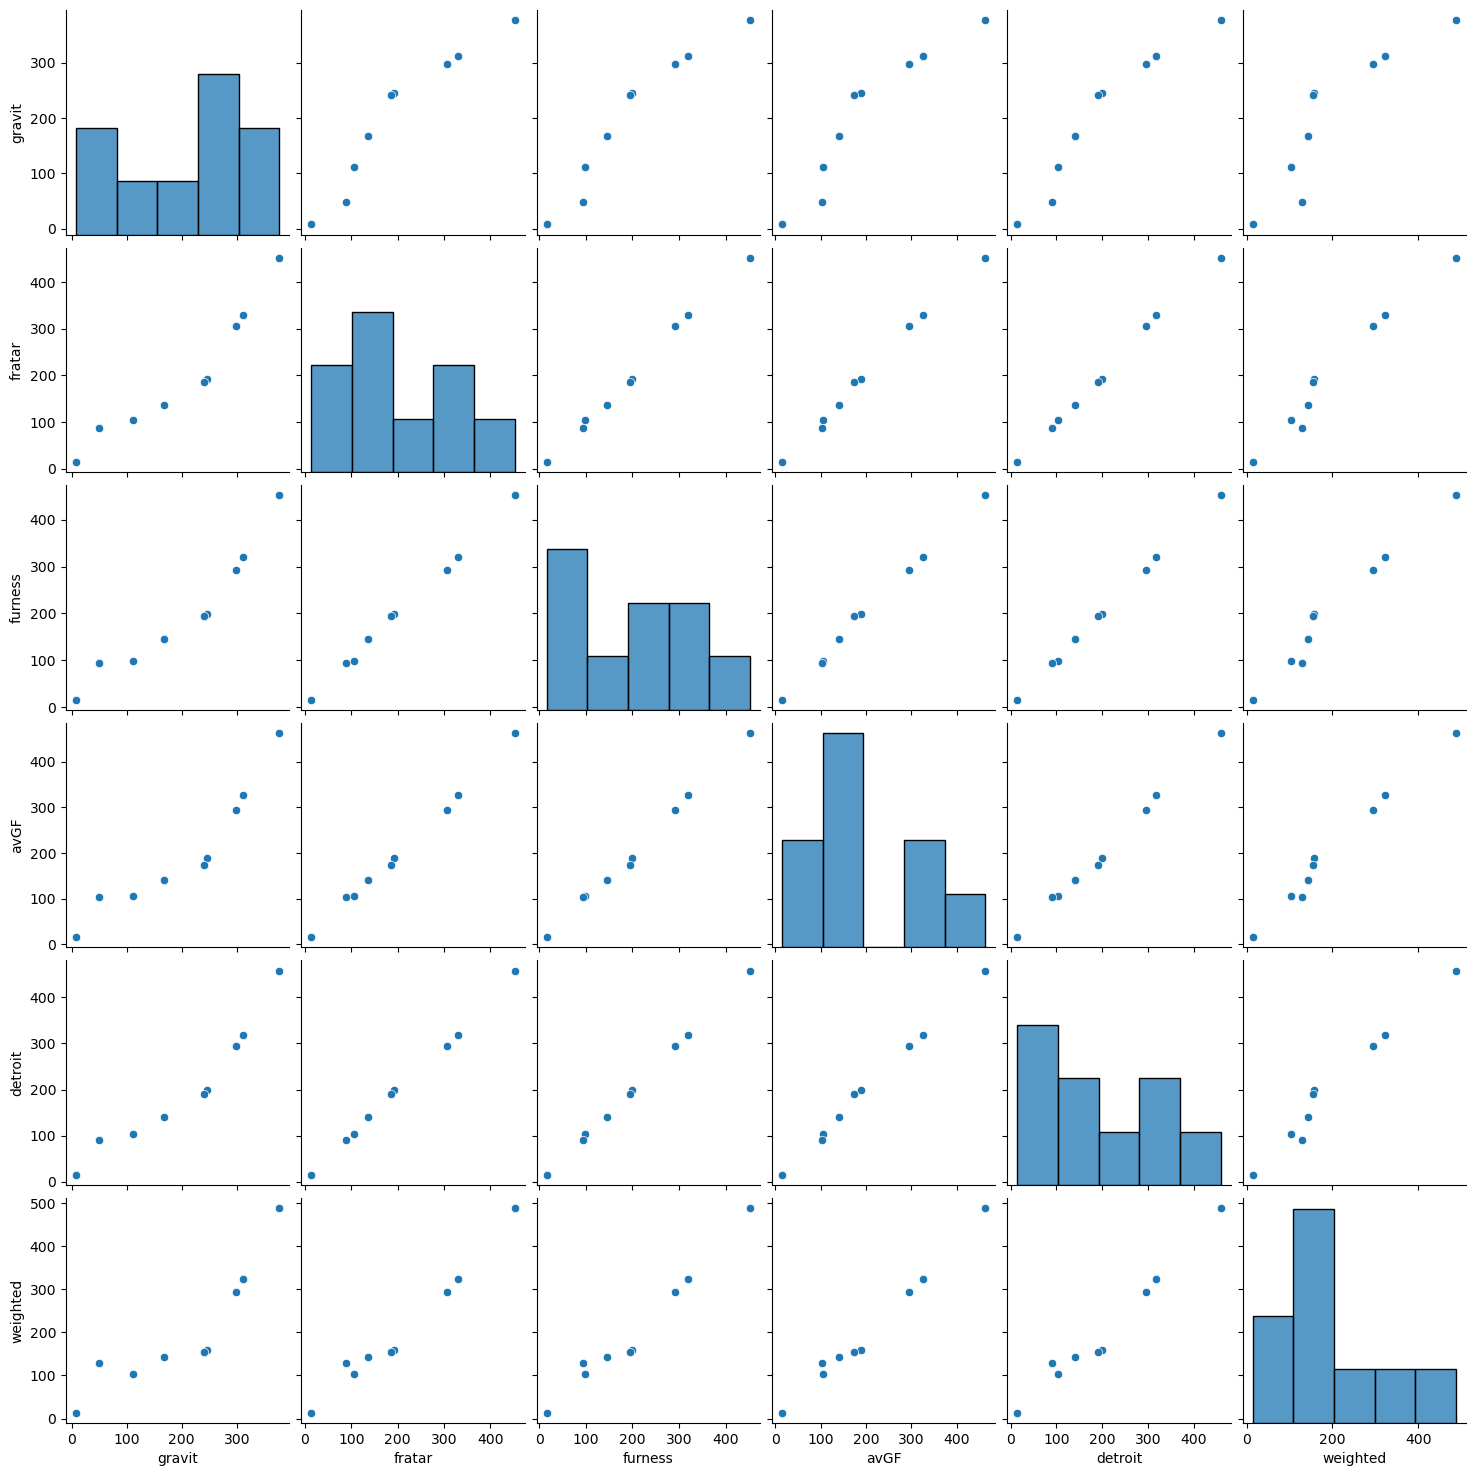

In [13]:
sns.pairplot(all_travs)

<Axes: xlabel='gravit', ylabel='Density'>

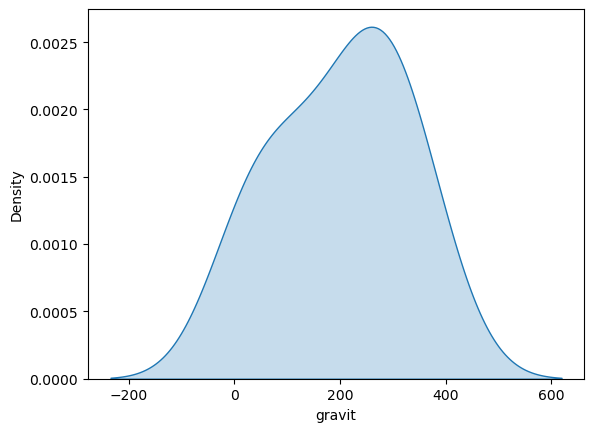

In [14]:
sns.kdeplot(data=all_travs['gravit'], fill=True)

<Axes: xlabel='fratar', ylabel='Density'>

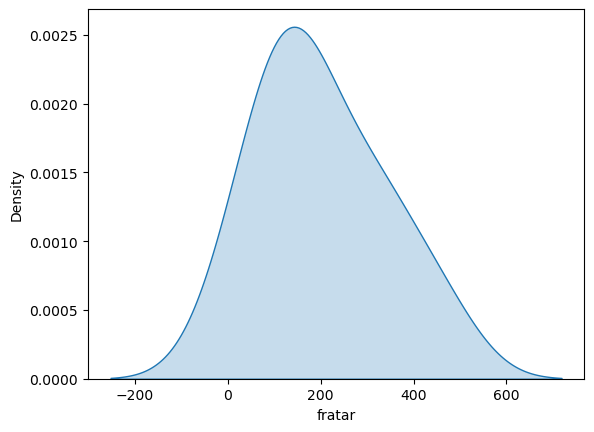

In [15]:
sns.kdeplot(data=all_travs['fratar'], fill=True)

<Axes: xlabel='furness', ylabel='Density'>

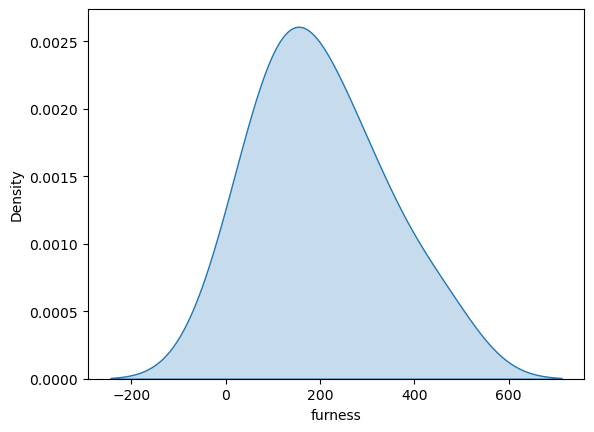

In [16]:
sns.kdeplot(data=all_travs['furness'], fill=True)

<Axes: xlabel='avGF', ylabel='Density'>

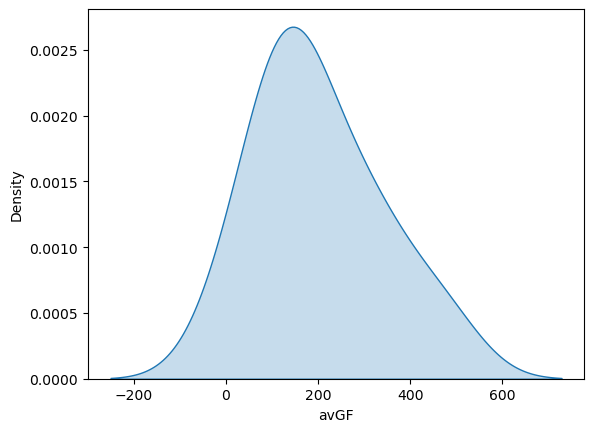

In [17]:
sns.kdeplot(data=all_travs['avGF'], fill=True)

<Axes: xlabel='detroit', ylabel='Density'>

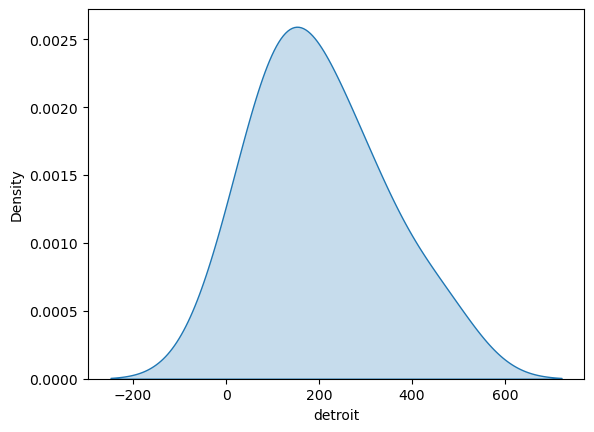

In [18]:
sns.kdeplot(data=all_travs['detroit'], fill=True)

<Axes: xlabel='weighted', ylabel='Density'>

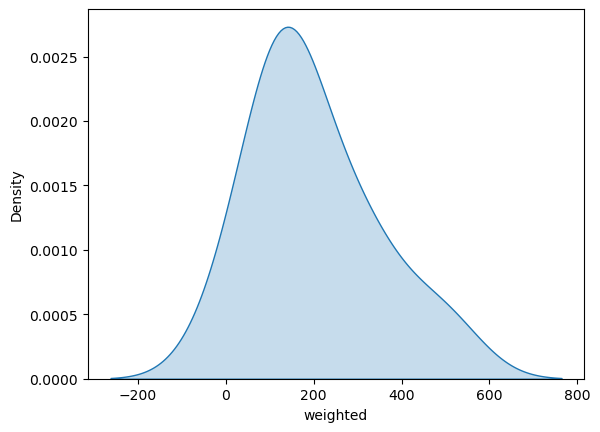

In [19]:
sns.kdeplot(data=all_travs['weighted'], fill=True)

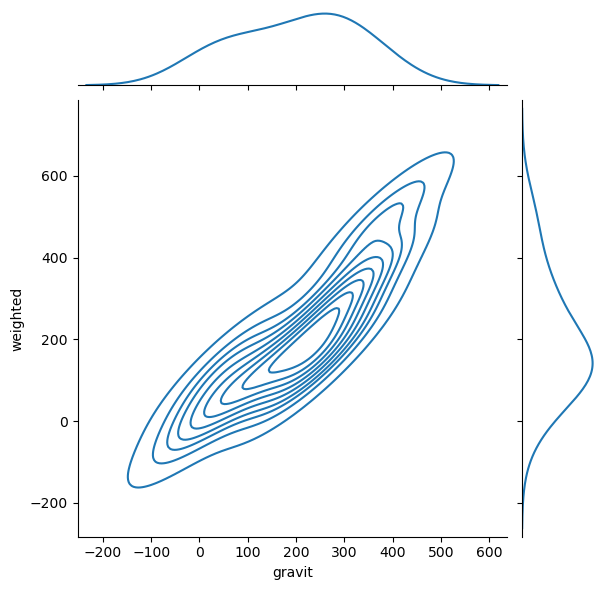

In [20]:
sns.jointplot(x=all_travs['gravit'], y=all_travs['weighted'], kind="kde")

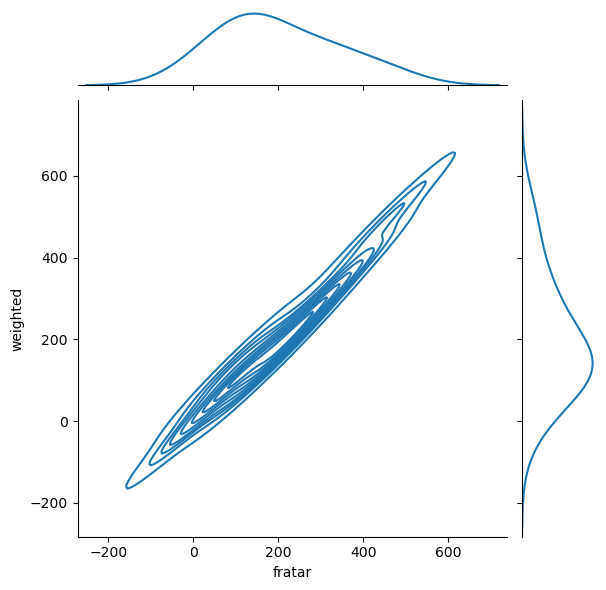

In [21]:
sns.jointplot(x=all_travs['fratar'], y=all_travs['weighted'], kind="kde")

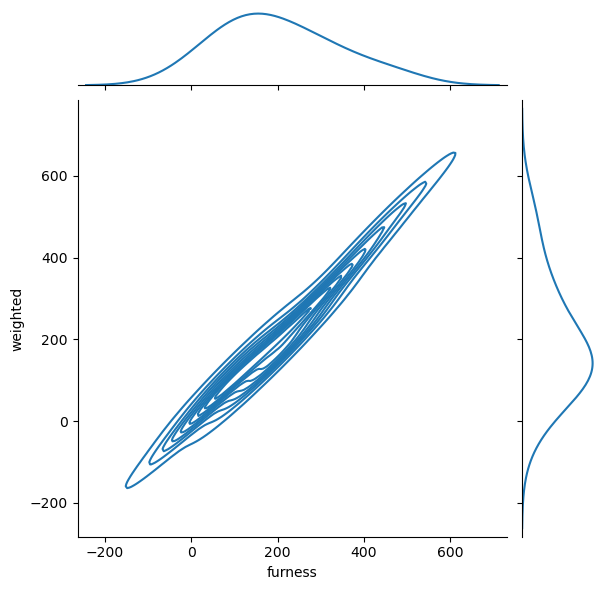

In [22]:
sns.jointplot(x=all_travs['furness'], y=all_travs['weighted'], kind="kde")

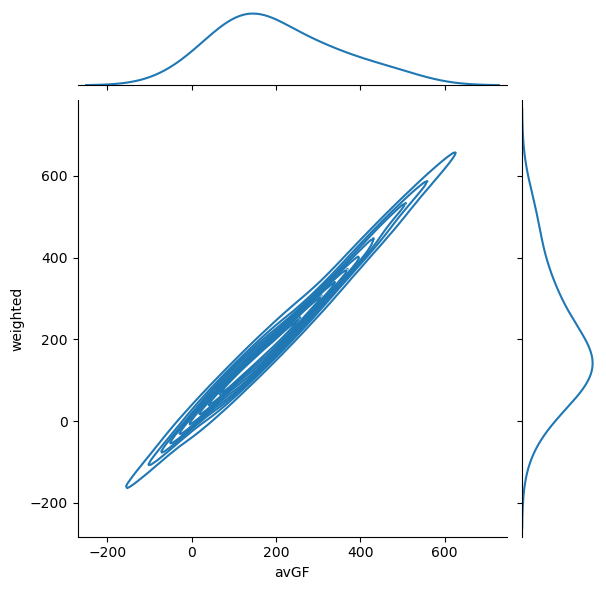

In [23]:
sns.jointplot(x=all_travs['avGF'], y=all_travs['weighted'], kind="kde")

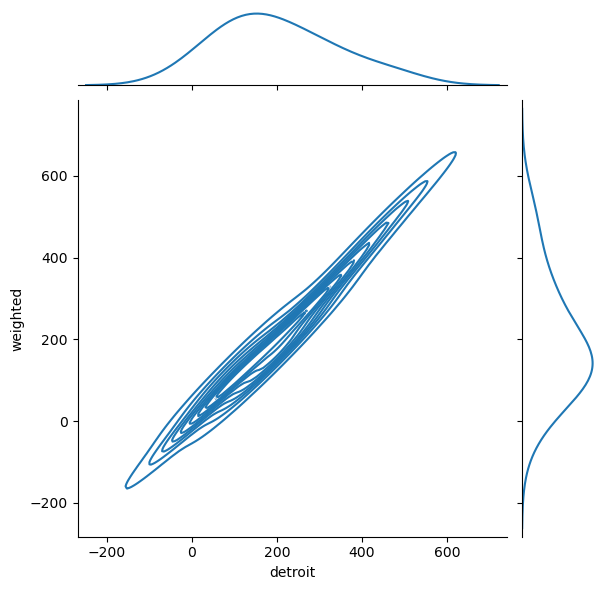

In [24]:
sns.jointplot(x=all_travs['detroit'], y=all_travs['weighted'], kind="kde")

#### Determine paired t-tests for the data sets
##### The data set generated with weighted method will be paired with each other data set, 
##### in order (i.e., gravitational, Fratar, Furness,average GF, and Detroit

In [25]:
# Comparing gravitational model with weighted data set

t_statistic, p_value = stats.ttest_rel(gvalsr_finAflat, travsc_wgtdflat)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.010096150418657912
P-value: 0.9921918062674884
The difference between the models is not statistically significant.


In [26]:
# Comparing Fratar with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_fratflat, travsc_wgtdflat)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01273265630648123
P-value: 0.9901528878717634
The difference between the models is not statistically significant.


In [27]:
# Comparing Furness with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_furnflat, travsc_wgtdflat)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.03676694226146441
P-value: 0.9715717242095561
The difference between the models is not statistically significant.


In [28]:
# Comparing average GF with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_avgfflat, travsc_wgtdflat)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.01855115169704455
P-value: 0.9856535013359454
The difference between the models is not statistically significant.


In [29]:
# Comparing Detroit with weighted data set

t_statistic, p_value = stats.ttest_rel(travsc_detrflat, travsc_wgtdflat)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.03813157118703993
P-value: 0.9705171551423453
The difference between the models is not statistically significant.


In [30]:
# check gravitational with Fratar also

t_statistic, p_value = stats.ttest_rel(gvalsr_finAflat, travsc_fratflat)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("The difference between the models is not statistically significant.")

T-statistic: 0.00783585007927433
P-value: 0.9939398386600368
The difference between the models is not statistically significant.
